In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
data = pd.read_csv("/content/drive/MyDrive/data set/instagram dataset.csv")
data.tail()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
594,0,0.58,1,0.0,0,0,0,0,0,49,22,1
595,0,0.00,1,0.0,0,0,0,0,0,15,595,1
596,1,0.20,2,0.0,0,0,0,0,1,1,9,1
597,0,0.00,1,0.0,0,0,0,0,0,17,1,1
598,1,0.29,3,0.0,0,48,0,0,1570,1128,694,0


In [3]:
data.shape

(599, 12)

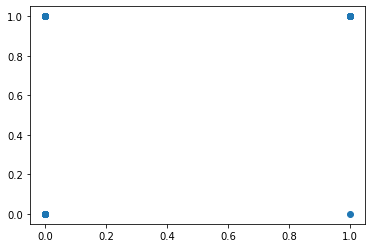

In [ ]:
plt.scatter(data["name==username"], data["fake"])
plt.show()

In [ ]:
y_data = data[["fake"]]
x_data = data.drop(columns={'fake'})

In [ ]:
y_data.head()

,fake
0,0
1,0
2,0
3,0
4,0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,Y_train)
predicted = logistic_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
predicted

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
predicted_df = pd.DataFrame(data=predicted)
predicted_df

,0
0,0
1,1
2,1
3,1
4,0
...,...
115,0
116,0
117,1
118,0


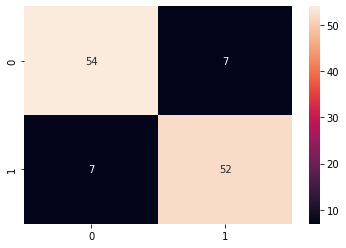

In [ ]:
fc = confusion_matrix(Y_test, predicted_df)
sns.heatmap(fc, annot = True)

In [ ]:
accuracy = ((fc[0,0] + fc[1,1]) / (fc[0,0]+fc[0,1]+fc[1,0]+fc[1,1]))*100
print(round(accuracy,2))

88.33


In [ ]:
error = 100 - accuracy
print(round(error,2))

11.67


In [ ]:
score = logistic_model.score(X_test, Y_test)
score*100

88.33333333333333

In [ ]:
score1 = accuracy_score(Y_test, predicted_df)
score1

0.8833333333333333

In [ ]:
print('Precision: %.3f' % precision_score(Y_test, predicted_df))

Precision: 0.881


In [ ]:
print('Recall: %.3f' % roc_auc_score(Y_test, predicted_df))

Recall: 0.883


In [ ]:
print('F1 Score: %.3f' % f1_score(Y_test, predicted_df))

F1 Score: 0.881


RANDOM FOREST CLASSIFIER

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)
predicted = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
predicted_df = pd.DataFrame(data=predicted)
predicted_df

,0
0,0
1,1
2,1
3,1
4,0
...,...
115,0
116,0
117,0
118,0


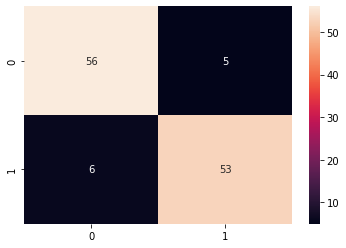

In [ ]:
fc = confusion_matrix(Y_test, predicted_df)
sns.heatmap(fc, annot = True)

In [ ]:
print('accuracy: %.3f' % accuracy_score(Y_test, predicted_df))

accuracy: 0.908
